In [59]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [64]:
def load_csv(filename, skip_rows):
    df = pd.read_csv(filename, skiprows=skip_rows, header=0)
    df.drop(df.columns[0], axis=1, inplace=True)
    return df

def calculate_final_price_avg(df, retailer_0_start, retailer_1_start):
    df_even = df.iloc[:, retailer_0_start::6]
    retailer_0_price = round(df_even.iloc[-1].mean(), 2)
    
    df_odd = df.iloc[:, retailer_1_start::6]
    retailer_1_price = round(df_odd.iloc[-1].mean(), 2)
    return [retailer_0_price, retailer_1_price]

# def calculate_final_price_avg(df):
#     df_even = df.iloc[:, 2::6]
#     retailer_0_price = round(df_even.iloc[-1].mean(), 2)
    
#     df_odd = df.iloc[:, 5::6]
#     retailer_1_price = round(df_odd.iloc[-1].mean(), 2)
#     return [retailer_0_price, retailer_1_price]
    
def plot_price_comparison_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile}{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_price_avg(df, 2, 5)

        labels = [f'R1_weight_{weight}', f'R2_weight_{weight}']
        ax.bar(labels, avg_prices)
    ax.set_ylabel('Final Price')
    plt.title(title)
    plt.plot()


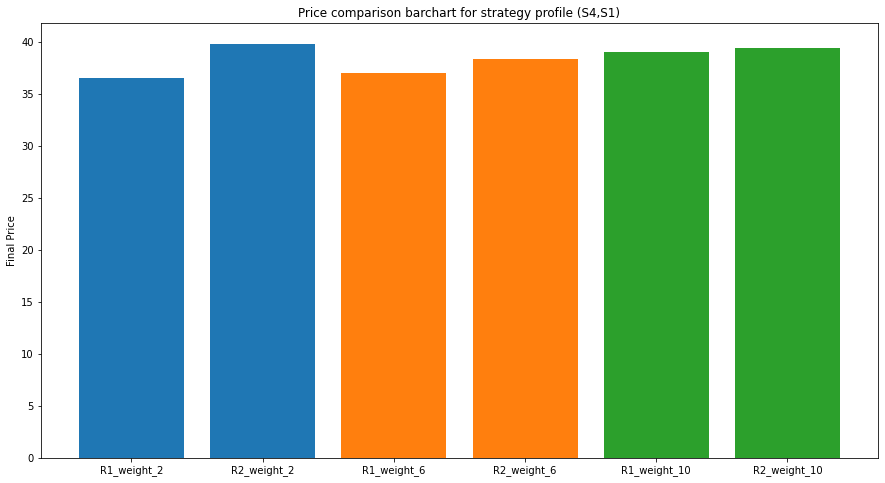

In [65]:
plot_price_comparison_graph('S4_S1_price_', 'Price comparison barchart for strategy profile (S4,S1)')

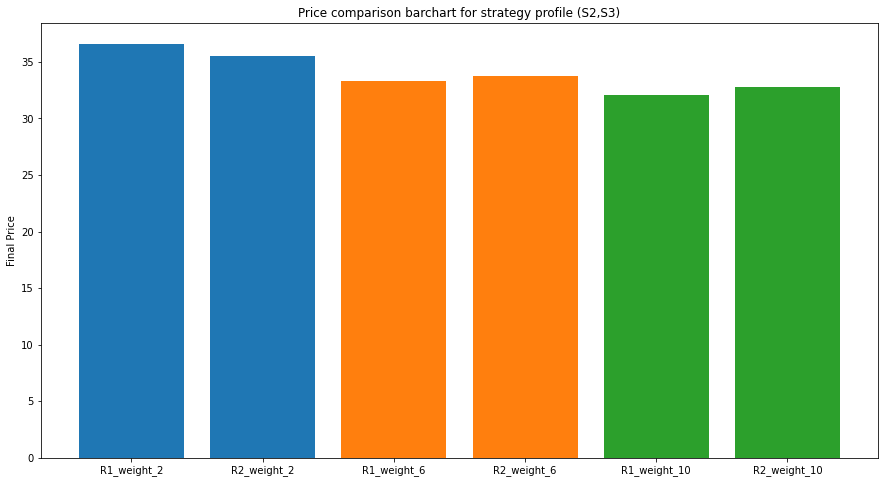

In [66]:
plot_price_comparison_graph('S2_S3_price_bis_', 'Price comparison barchart for strategy profile (S2,S3)')

In [12]:
df = load_csv('./experiment_data/S4_S1_price_2.csv', 34)
df_even = df.iloc[:, 2::6]
display(df_even)

df_odd = df.iloc[:, 5::6]
display(df_odd)

calculate_final_price_avg(df)

,[ price ] of retailer 0,[ price ] of retailer 0.1,[ price ] of retailer 0.2,[ price ] of retailer 0.3
0,36,36,36,36
1,37,37,37,37
2,37,37,37,37
3,37,37,37,37
4,37,37,37,37
...,...,...,...,...
1995,36,34,38,38
1996,36,34,38,38
1997,36,34,38,38
1998,36,34,38,38


,[ price ] of retailer 1,[ price ] of retailer 1.1,[ price ] of retailer 1.2,[ price ] of retailer 1.3
0,42.0,42.0,42.0,42.0
1,41.8,41.8,41.8,41.8
2,41.8,41.8,41.8,41.8
3,41.8,41.8,41.8,41.8
4,41.8,41.8,41.8,41.8
...,...,...,...,...
1995,39.0,39.0,40.6,40.6
1996,39.0,39.0,40.6,40.6
1997,39.0,39.0,40.6,40.6
1998,39.0,39.0,40.6,40.6


,[ price ] of retailer 0,[ price ] of retailer 0.1,[ price ] of retailer 0.2,[ price ] of retailer 0.3
0,36,36,36,36
1,37,37,37,37
2,37,37,37,37
3,37,37,37,37
4,37,37,37,37
...,...,...,...,...
1995,36,34,38,38
1996,36,34,38,38
1997,36,34,38,38
1998,36,34,38,38


AVG Cumulative Profit of retailer 0: 36.5


,[ price ] of retailer 1,[ price ] of retailer 1.1,[ price ] of retailer 1.2,[ price ] of retailer 1.3
0,42.0,42.0,42.0,42.0
1,41.8,41.8,41.8,41.8
2,41.8,41.8,41.8,41.8
3,41.8,41.8,41.8,41.8
4,41.8,41.8,41.8,41.8
...,...,...,...,...
1995,39.0,39.0,40.6,40.6
1996,39.0,39.0,40.6,40.6
1997,39.0,39.0,40.6,40.6
1998,39.0,39.0,40.6,40.6


AVG Cumulative Profit of retailer 1: 39.8


(36.5, 39.8)